# Geographic analysis of web text resources

Data matters. In recent years, the amount of data freely and readily available on the web, which can be used for geographic analysis, has increased tremendously. At the same time, due to the coming of age of Web service technology, it has become easier than ever to access these data. An example is geodata from social media, such as Foursquare. However, most of this data is only available in the form of unstructured text, which makes it difficult to exploit for automated analysis. Foursquare contains huge amounts of data about places to visit in a city, together with user ratings and user tips. To make full use of such text-based geographic data sources on the web, you need to combine text mining with Geographic Information Systems (GIS). In this course, we generate maps and charts about different geographic themes (latent semantic topics) of places in a city using Point-Of-Interest (POI) data from a Web API (Foursquare), and apply Natural Language Processing (NLP) to extract topics from the reviews. The result is visualized as plots and maps in QGIS.

**The objectives** of this notebook are to:
- understand and use a web API to list user tips from different places, 
- apply Natural Language Programming methods to experiment with basic text analysis, and 
- to handle basic geocomputational methods and mapping techniques in Python. 

Using a scripting language increases your capacities of streamlining text mining methods and text data for your own geographic research. It will also help you finish data intensive tasks in your future job as geographer, analyst or planner, without requiring advanced software programming skills. This becomes more and more important in every area of research and policy. Note, however, that acquiring autonomous skills in these areas (text mining, GIS and Python) requires much more extensive training than this notebook.

## Content and learning objectives
### Content summary
The main assignment of the course (described later in this manual) is a study about the distribution of latent semantic topics across urban space. Such a topic may describe what can be done or experienced at a place, e.g. “Where are places in town where you can eat grilled meat?”. The goal is to obtain high resolution Web data about some type of urban place of your choice (e.g. food shops, restaurants, bars, …), to do some form of automatized text analysis (text mining) of web texts about these places to obtain distributions of topics across cities, and to map and discuss these topics using GIS. Such detailed semantic information is not available at the moment in commercial datasets. The choice of this specific topic has two reasons:
•	In order to help you with learn programming, you will work on a self-chosen problem in a rather rigid, predefined technical context (Foursquare, Python) (see Fig. 1). In this way, we can pre-structure your task and provide you with programming templates that make it easy for you to get started.
•	Urban infrastructure is of relevance to researchers working in urban as well as economic geography. Classical studies may obtain either summary statistics (such as CBS data) for an area or use high resolution commercial datasets from some point in time.  Our focus is exploiting structured and unstructured Web data (user generated content (UGC) and web texts), which is inherently dynamic, and where the quality depends on the level of service.
To this end, you will perform the following steps (compare Fig. 1):
1.	Choose a research question about urban places and their latent semantic topics. Choose two cities and survey the Foursquare data available for that city with respect to that question. An example would be: Where are places in town where you can eat grilled meat?
2.	Collect urban place data from the Foursquare in an automated fashion (using the Foursquare API).
3.	Analyse your place data with respect to the distribution of topics: 
•	Design a text mining and geoprocessing workflow in Python to generate and analyse topic distributions over several cities. Compute a kernel density raster in GIS which shows the accessibility to facilities of a certain topic, and summarize rasters into administrative regions (CBS neighbourhoods) for which other statistical data is available. You should choose ArcGIS tools for this purpose and write Python code that executes these analyses.
•	Design at least 4 maps about topic distributions that summarize your analysis.
4.	Present (5 minutes) and discuss the results with the whole course. In your presentation you should:
•	Present and interpret 2 interesting semantic topics extracted from web texts across 2 municipalities, illustrated with word clouds and website examples
•	Show 4 maps of spatial topic distributions, for 2 topics across 2 cities. Compare maps between cities and between topics
•	Discuss the data quality and the data’s usefulness. Also discuss the potential of Web APIs for geographic analysis


### Learning objectives
In order to finish the course successfully, you need to acquire the following skills:
1.	Design, write and debug a simple program in Python with the goal of applying it as a script for an analysis task
2.	Exploit Web technology, natural language processing (NLP) and text mining for geographic data in Python
3.	Choose and apply GIS tools, geoprocessing and mapping technology for geographic analysis
4.	Evaluate, explain and discuss data quality, maps and analysis results
Learning outcome 1 and 2 are prerequisites for designing analysis workflows and reusing data available on the Web. Learning outcome 3 is important to enable you to reuse GIS methods in your work. Learning outcome 4 enables you to critically evaluate the quality of your analysis.





# 1. Web scraping from the Foursquare API

[Foursquare](https://foursquare.com/) is a social media site, which allows people to check into places, and describe and rate these places. 

### Getting started
In order to access the Foursquare data, you need to create a Foursquare account. The free Sandbox tier is enough. If you want to make use of more data volumes per day, you can also verify with your credit card to get a personal tier. Note that the credit card is only used for verification purposes. 
Sign up [here](https://location.foursquare.com/developer/) by clicking on `Get started for free`. If you have obtained your *Client ID* and *Secret Key*, make sure you store these two in safe place.

Now that you have an account, get started with the [Places API](https://location.foursquare.com/developer/reference/places-api-get-started) by creating a new project, generate an *API key*, and build and test your first API call. Note the two red ellipses in the figure below. 
Make sure you set
- the language to Python, 
- the `near` query parameter to Utrecht, and 
- the `categories` parameter to 13000.

Click on `Try it!` to run the code and inspect the response from the API call. 

![fsq places API](../img/GA-WEB/FSQ-API.png)


**Questions 1**
1. We specified 13000 as `categories` in the query parameter. Inspect the response text on the website. What kind of places are these? 
2. The numbering of the categories is explained [here](https://location.foursquare.com/places/docs/categories). How can you search for places related to `Landmarks and Outdoors`? Adjust the online interface to search for these kind of places. 

## 1.1 My first API call
The Place Search website also gives the Python code that can be used in other environments. The [requests](https://requests.readthedocs.io/en/latest/user/quickstart/) library handles the http requests to the Foursquare website. Note that the url is adjusted every time you change the query parameters. In addition, there are the headers that are used to pass information about the website and the client. Run the cell below.

In [1]:
import requests

url = "https://api.foursquare.com/v3/places/search?categories=13000&near=Utrecht&sort=DISTANCE&limit=1"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3H7qeNcRSPCvvV7cyXjHAPljULx40rSKQHimXTXSfVVw="
}

response = requests.get(url, headers=headers)

This gives the website's response, which can be inspected:

In [2]:
print('status: ', response.status_code, end='\n\n')
print('headers: ', response.headers, end='\n\n')
print('text: ', response.text)    

status:  200

headers:  {'Connection': 'keep-alive', 'Content-Length': '468', 'Content-Type': 'application/json; charset=utf-8', 'Link': '<https://api.foursquare.com/v3/places/search?cursor=c3I6MQ&near=Utrecht&categories=13000&sort=DISTANCE&limit=1>; rel="next"', 'Server': 'Finatra', 'X-Fsq-Request-ID': '6380a0bec13082456b296ac5', 'X-RateLimit-Path': '/v3/places/search', 'X-RateLimit-Limit': '360000', 'X-RateLimit-Reset': '1669377742', 'X-RateLimit-Remaining': '359999', 'content-encoding': 'gzip', 'Accept-Ranges': 'bytes', 'Date': 'Fri, 25 Nov 2022 11:02:23 GMT', 'Via': '1.1 varnish', 'X-Served-By': 'cache-ams21079-AMS', 'X-Cache': 'MISS', 'X-Cache-Hits': '0', 'X-Timer': 'S1669374142.448694,VS0,VE569', 'Vary': 'Origin'}

text:  {"results":[{"fsq_id":"5055cc8ee4b0244ddedd4b35","categories":[{"id":13003,"name":"Bar","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/nightlife/pub_","suffix":".png"}},{"id":13034,"name":"Café","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/

### Refactoring the code for reuse
Feed the query parameters as a dictionary to the request and wrap it into a function

In [3]:
def get_fsq_data(url, headers, params):
    '''
    Request data from the Foursquare Places API, v3.
    
    Parameters:
    url:     'string', API's web address, e.g. https://api.foursquare.com/v3/places/search?
    headers: 'dictionary', dictionary with headers information for the call
    params:  'dictionary', dictionary with query parameters
    '''
    response = requests.get(url, headers=headers, params=params)
    assert response.ok == True
    
    return response

places_url = "https://api.foursquare.com/v3/places/search?"

headers = {
    "accept": "application/json",
    "Authorization": "fsq3H7qeNcRSPCvvV7cyXjHAPljULx40rSKQHimXTXSfVVw="
}

params = dict(near='Utrecht',
              categories=13000,
              limit=5,
              sort='DISTANCE'
             )

response = get_fsq_data(places_url, headers=headers, params=params)

In [4]:
import json
import pandas as pd
import geopandas as gpd

results_dict = json.loads(response.text)['results']
results_df = pd.json_normalize(results_dict)
results_df

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,geocodes.roof.longitude,location.address,location.country,location.cross_street,location.formatted_address,location.locality,location.postcode,location.region,location.neighborhood
0,50dd71a3e4b0ec80ac1667d4,"[{'id': 13002, 'name': 'Bakery', 'icon': {'pre...",[],63,/v3/places/50dd71a3e4b0ec80ac1667d4,Carla's Conditorie,Europe/Amsterdam,52.091122,5.122986,52.091122,5.122986,Achter de Dom 6,NL,,"Achter de Dom 6, 3512 JP Utrecht",Utrecht,3512 JP,Utrecht,NaN
1,5055cc8ee4b0244ddedd4b35,"[{'id': 13003, 'name': 'Bar', 'icon': {'prefix...",[],95,/v3/places/5055cc8ee4b0244ddedd4b35,Grand Cafe Lebowski,Europe/Amsterdam,52.090681,5.120829,52.090681,5.120829,Domplein 17,NL,NaN,"Domplein 17, 3512 JD Utrecht",Utrecht,3512 JD,Utrecht,NaN
2,4bb5bd94f562ef3b0d382f97,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],123,/v3/places/4bb5bd94f562ef3b0d382f97,Graaf Floris Café Restaurant,Europe/Amsterdam,52.090880,5.120441,52.090880,5.120441,Vismarkt 13,NL,NaN,"Vismarkt 13, 3511 KS Utrecht",Utrecht,3511 KS,Utrecht,NaN
3,585d0f3c8190793ef7bea254,"[{'id': 13065, 'name': 'Restaurant', 'icon': {...",[],130,/v3/places/585d0f3c8190793ef7bea254,Teds Utrecht - All Day Brunch,Europe/Amsterdam,52.090277,5.120809,52.090277,5.120809,Lichte Gaard 8,NL,,"Lichte Gaard 8, 3511 KT Utrecht",Utrecht,3511 KT,Utrecht,[Domplein]
4,57764381498e0c728b861a12,"[{'id': 13035, 'name': 'Coffee Shop', 'icon': ...",[],160,/v3/places/57764381498e0c728b861a12,Hop & Stork,Europe/Amsterdam,52.090117,5.119993,52.090117,5.119993,Lijnmarkt 1,NL,,"Lijnmarkt 1, 3511 KE Utrecht",Utrecht,3511 KE,Utrecht,NaN


**Questions 2**
Foursquare returns many attributes of each place.
1. Which attributes (columns) contain the geographic information on the northing and easting? 
2. What are the units of the easting and northing?
3. What query parameter limits the number places that can be requested with a single API call? How many places is the maximum?

## 1.2 Getting place tips
The Places API provides information on the details of the location, whereas the tips are available at the `Get Place Tips` API. Open the [tips API](https://location.foursquare.com/developer/reference/place-tips). Fill in your API key and select one of the places for which you want to have the tips. Select the ID of the place (`fsq_id` in the dataframe above) and paste in the `fsq_id` field online. It should look similar to the figure below. Inspect the url in the code block and note that it contains the `fsq_id`. 

![fsq tips API](../img/GA-WEB/FSQ-tips-API.png)

Let's reuse the function before, but now with the url and query parameters appropriate for the tips API.

In [5]:
fsq_id = '4b5849b2f964a520215128e3' # De Rechtbank
tips_url = f"https://api.foursquare.com/v3/places/{fsq_id}/tips"

tips_params = dict(
    limit=5,
    fields='lang,text,created_at'
    )

tips_response = get_fsq_data(url=tips_url, headers=headers, params=tips_params)
tips_df = pd.json_normalize(json.loads(tips_response.text))
tips_df

,created_at,text,lang
0,2018-06-03T10:42:06.000Z,Outdoor seating is Great. Stuff for kids to pl...,en
1,2019-07-20T12:10:36.000Z,"Nice atmosphere and food, either inside or out...",en
2,2016-09-10T20:15:30.000Z,"Lovely food, good outdoors, decent prices. Bit...",en
3,2015-11-30T11:41:06.000Z,Always the Caesar salad. It's nice and richly ...,en
4,2018-07-08T16:43:17.000Z,"Nice garden, good service. My pasta with seafo...",en


### Accessing all query results using pagination
The maximum number of results that the request will give is 50, both for the Places and the Tips API. Many queries will result in a larger number of results though. These can be accessed through the so-called pagination: separating content into discrete pages. The response contains the first page, but the response headers contains information on where to find the additional pages. This is stored in the `links' of the response.

In [6]:
print(tips_response.links)
url_next = tips_response.links['next']['url']
print('\nUrl of the next page: \n', url_next)

{'next': {'url': 'https://api.foursquare.com/v3/places/4b5849b2f964a520215128e3/tips?limit=5&cursor=ZnE6NQ&fsq_id=4b5849b2f964a520215128e3&fields=lang%2Ctext%2Ccreated_at', 'rel': 'next'}}

Url of the next page: 
 https://api.foursquare.com/v3/places/4b5849b2f964a520215128e3/tips?limit=5&cursor=ZnE6NQ&fsq_id=4b5849b2f964a520215128e3&fields=lang%2Ctext%2Ccreated_at


Note that the url of the next page has an added parameter `cursor`, which points to the next page in the list. If we make an API call to the next page, the cursor in the link will change again.

In [7]:
tips_response_6_to_10 = get_fsq_data(url = url_next, headers=headers, params={})
url_next = tips_response_6_to_10.links['next']['url']
print('Url of the next page: \n', url_next)
tips_df_6_to_10 = pd.json_normalize(json.loads(tips_response_6_to_10.text))
tips_df_6_to_10

Url of the next page: 
 https://api.foursquare.com/v3/places/4b5849b2f964a520215128e3/tips?limit=5&cursor=ZnE6MTA&fsq_id=4b5849b2f964a520215128e3&fsq_id=4b5849b2f964a520215128e3&fields=lang%2Ctext%2Ccreated_at


,created_at,text,lang
0,2015-12-06T16:02:19.000Z,"Nice place, good food, great place to meet fri...",en
1,2013-08-04T10:22:48.000Z,Skip the terrace on sunny Sunday mornings. Kid...,en
2,2012-04-16T06:48:58.000Z,King crab is a must to try. It will take 2 hours,en
3,2012-11-29T19:53:58.000Z,"Ask for the french fries, they are delicious.",en
4,2014-11-13T23:40:44.000Z,Nice Resturant nice food,en


**Question 3** Write the code to call for the next five tips on this place.
1. How can you determine the total number of tips that a place have? Discuss this with a fellow student.

One option to find the total number of tips is to iterate over the links until there is no more links left. In Python you can use the `while` statement for that. While the conditions are still true, do the tasks listed in the while loop. The code below illustrates that with the Tips API. The conditions are that (1) the dictionary returned from `response.links` should have a key in it quantified as the requirement that the dictionary length equals 1. `And` there should be a string in the `response.text`. If both these conditions are true, continue with the loop.

In [8]:
fsq_id = '4b5849b2f964a520215128e3' # De Rechtbank
tips_url = f"https://api.foursquare.com/v3/places/{fsq_id}/tips"

tips_params = dict(
    limit=50,
    fields='lang,text,created_at'
    )
response = get_fsq_data(url=tips_url, headers=headers, params=tips_params)

while (len(response.links) == 1) and len(response.text) > 100:
    url_next = response.links['next']['url']
    response = get_fsq_data(url_next, headers=headers, params={})
    url_next = response.links['next']['url']
    print('Url of the next page: \n', url_next)

The function `get_fsq_df` below brings all components together. It takes a url, headers and parameters and returns all the data as a single dataframe. This provides you with powerful access to any place anywhere on the globe and extract place information and tips. 

**Exercise** Try out different query parameters for the places to get tips for a restaurant in Utrecht, Amsterdam and Enschede.

In [9]:
def get_fsq_df(url, headers, params):
    '''
    Request data from the v3 Foursquare Tips or Places API and return all pages in a dataframe.
    
    Parameters:
    url:     'string', API's web address, e.g. https://api.foursquare.com/v3/places/search?
    headers: 'dictionary', dictionary with headers information for the call
    params:  'dictionary', dictionary with query parameters
    
    Returns a DataFrame with the FSQ data
    '''
    pages_list = []   # container for final output
    response = requests.get(url, headers=headers, params=params)
    assert response.ok == True
    
    if 'search?' in url: # in the case of the Places API
        df = pd.json_normalize(json.loads(response.text)['results'])
    elif 'tips' in url:  # in the case of the Tips API
        df = pd.json_normalize(json.loads(response.text))
        
    # print out the progress
    pages_list.append(df)
#     print('\nRequest number: ', len(pages_list), end=', ')

    # Iterate the call until no more pages are available
    while (len(response.links) == 1) and len(response.text) > 100:
        url_next = response.links['next']['url']
        response = requests.get(url_next, headers=headers)
        assert response.ok == True    
        if 'search?' in url:
            df = pd.json_normalize(json.loads(response.text)['results'])
        elif 'tips' in url:
            df = pd.json_normalize(json.loads(response.text))
            
        pages_list.append(df)
#         print(len(pages_list), end=', ')
            
    # Create a single dataframe with all data
    all_pages = pd.concat(pages_list, axis=0)
    all_pages.reset_index(inplace=True, drop=True)

    return all_pages

# test with Places
url_places = "https://api.foursquare.com/v3/places/search?"
params_places = dict(
    near='Utrecht',
    categories=13000,
    limit=50
)
places = get_fsq_df(url_places, headers, params_places)

# test with Tips
fsq_id = '4b5849b2f964a520215128e3' # De Rechtbank in Utrecht
url_tips = f"https://api.foursquare.com/v3/places/{fsq_id}/tips"
params_tips = dict(
    limit=50,
    fields='lang,text,created_at'
    )
tips = get_fsq_df(url_tips, headers, params_tips)


Request number:  1, 2, 
Request number:  1, 

## 1.3 Putting tips in their place
So far, we just collected data from an API without considering their location. The places have latitude and longitude describing their location, but the tips do not have a spatial reference. Their location can only be accessed through the `fsq_id`. From the geography point of view, we are interested in where the tips were given and patterns in the tips. 

A `GeoDataFrame` describes vector data, such as points, lines and polygons. A `GeoDataFrame` is a similar to a pandas DataFrame, but it has a `geometry` column, which stores the vector data. In addition, it has a coordinate reference system.
Read background information on [Geopandas](https://geopandas.org/en/stable/getting_started/introduction.html) the [`points_from_xy`](https://geopandas.org/en/stable/docs/reference/api/geopandas.points_from_xy.html#geopandas.points_from_xy) and the [`explore`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html)

In [10]:
import geopandas as gpd
geometry = gpd.points_from_xy(places['geocodes.main.longitude'], places['geocodes.main.latitude'], crs="EPSG:4326")
places_gdf = gpd.GeoDataFrame(places, geometry=geometry)
places_gdf.explore(marker_kwds=dict(radius=5, fill=False),
            style_kwds=dict(weight=1, color='red' )
           )

Hover with your mouse over the red circles to see the Places data. Note that there is a lot of redundant information and that the tips are not yet visible. First, we clean up the data be selecting only the relevant columns. 

In [11]:
# Select only the relevant columns
places_neat = places_gdf.loc[:,['geometry', 'fsq_id', 'name', 'distance']]
places_neat = places_neat.dropna(subset=['geometry', 'name'])

# Extract tips for each place and add them to columns for tips in English and tips in Dutch
places_tips = places_neat.copy()
places_tips.index = places_tips.fsq_id
places_tips['tips_english'] = ' '
places_tips['tips_dutch'] = ' '

for fsq_id in places_tips.index[0:]:
    name = places_tips.loc[fsq_id, 'name']
    tips_place_url = f"https://api.foursquare.com/v3/places/{fsq_id}/tips"
    tips = get_fsq_df(tips_place_url, headers, params_tips)
    
    if len(tips) > 0:
        tips_in_english = tips[tips.lang == "en"]
        places_tips.loc[fsq_id, 'tips_english'] = '; '.join(tips_in_english.text)
        tips_in_dutch = tips[tips.lang == "nl"]
        places_tips.loc[fsq_id, 'tips_dutch'] = '; '.join(tips_in_dutch.text)
    
#     print('\n', name, fsq_id, tips.shape)

places_tips.reset_index(drop=True, inplace=True)



Request number:  1, 
Request number:  1, 2, 3, 4, 
Request number:  1, 
Request number:  1, 2, 3, 4, 5, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request number:  1, 
Request numb

Now we have a spatial distribution of Dutch and English tips for the places that we selected. To wrap up, we save the data set to file in geojson format. 
**Exercise** Open the data in QGIS. Open the attribute table and hover with your mouse over the tips. Now, you can read all the tips 

In [12]:
places_tips.to_file('../scratch/places_with_tips.geojson', driver='GeoJSON' )
places_tips.to_csv('../scratch/places_tips_tips.csv')
places_tips.explore()

# 2. Topic extraction

In this section, you learn how to train a text mining method for extracting latent topics. We will use Latent Dirichlet Allocation (LDA) for this task. If you want to learn more about LDAs, [here](https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/) is a beginner’s tutorial for learning about LDA using the `gensim` library that we will also use in this section. 

We will cover three components: 
1. Tokenization of text
2. Creation of the document terms matrix
3. Extraction of topics from the tips.

## Tokenization of text
Tokens are meaningful and normalized “words” extracted from a text that can be used in Natural Language Processing (NLP) in order to quantitatively analyse and compare texts.  For this reason, the methods are also called “bag of words” methods. The process consists of three steps:
1.	Break a text string up into a list of words (word tokenize), e.g. “Owls are birds of prey!” into “Owl”, “are”, “birds”, “of”, “prey”,”!”
2.	Remove stopwords which carry less meaning in a sentence (such as “of”, “are”, “about”, “am”, “I”, “and”, ”so”, “at”, “such”, “with”,…), punctuation (“!”) and numbers 
3.	Stem the words, in order to remove distinctions between e.g. “Owl” and “Owls” and “birds” and “bird”.

The latter two tasks are language specific, and so we need to make use of a language package of the [NLTK](https://www.nltk.org/) module. Take a look at the [tutorial](https://pythonprogramming.net/stemming-nltk-tutorial/). 

### Break up the text
In the module NLTK, the first step can be done with the method `nltk.word_tokenize()`. 

In [13]:
import nltk 
print(nltk.word_tokenize('Owls are birds of prey!'))
print(nltk.word_tokenize('This’s a test'))

['Owls', 'are', 'birds', 'of', 'prey', '!']
['This', '’', 's', 'a', 'test']


### Remove stopwords
To remove the stopwords from tokenized text, we need a list of stopwords, which we can download from the `nltk` library.

In [14]:
# nltk.download('popular')
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords

stop = set(stopwords.words('English'))

Then remove these words from the list of tokens, using list comprehension

In [15]:
tokens = nltk.word_tokenize('Owls are birds of prey! They fly in groups of 3.')
tokens = [i for i in tokens if i not in stop]  
tokens

['Owls', 'birds', 'prey', '!', 'They', 'fly', 'groups', '3', '.']

In the same way, let’s also remove punctuation and alphanumeric characters, as well as URLs and strings that are smaller than 3 characters, in the same way.

In [16]:
import string
tokens = [i for i in tokens if i not in string.punctuation and len(i)>=3]
tokens = [i for i in tokens if i.isalpha() and 'www' not in i]    
tokens

['Owls', 'birds', 'prey', 'They', 'fly', 'groups']

### Stem the words
Let us try out two word stemmers

In [17]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import DutchStemmer

print(DutchStemmer().stem('vrienden'))
print(PorterStemmer().stem('Friends'))

tokens = [PorterStemmer().stem(i) for i in tokens]
tokens

vriend
friend


['owl', 'bird', 'prey', 'they', 'fli', 'group']

**Exercise**
Compile steps 1 to 3 in a single function called `tokenize`. This function can be used in the next step to tokenize all the  tips for all the places. Include a keyword argument in the function that lets the user set the language to either dutch or english

In [18]:
def tokenize(text, language='dutch'):
    """Turn a given text into tokens removing stopwords and stemming them."""
    # tokenize the words
    
    # remove stopwords, punctuation and alphanumeric characters
    
    # stem the words using the correct language
    return tokens


#Answer here:
def tokenize(text, language='dutch'):
    """
    Turn a given text into tokens removing stopwords and stemming them.
    
    parameters:
    text:   string, Dutch or English text string
    language: string, can be either 'dutch' or 'english' 
    
    Returns a list of meaningful stemmed words
    """
    # tokenize the words
    tokens = nltk.word_tokenize(text)
    
    # remove stopwords, punctuation and alphanumeric characters
    stop = set(stopwords.words(language))
    tokens = [i for i in tokens if i not in stop]
    tokens = [i for i in tokens if i not in string.punctuation and len(i) >= 3]
    tokens = [i for i in tokens if i.isalpha() and 'www' not in i]
    
    # stem the words using the correct language
    if language == 'dutch':
        p_stemmer = DutchStemmer()
    else:
        p_stemmer = PorterStemmer()
    tokens = [p_stemmer.stem(i) for i in tokens]
    
    return tokens

print(tokenize('Owls are birds of prey! They fly in groups of [3]', language='english'))

['owl', 'bird', 'prey', 'they', 'fli', 'group']


## Tokenize all tips
We can use the `tokenize` function to convert the tips in Dutch and the tips in English to cleaned and stemmed words. We will join the tokens using whitespace and add them to the `GeoDataFrame` to store the tokens. Let's first tokenize the tips for a single place

In [19]:
tips_en = places_tips.loc[0,'tips_english']
print(tips_en)
tokenize(tips_en, language='english')

Great place for lunch or coffee. Swedish sandwiches are original and tasty, as are the cakes. Nice location as well.; One of the most beautiful terraces in the city. Treat yourself with a smushi (I love the hering) or one of the other delectable sandwiches.; Everything is so good! The next time I'm going to try the Chai Latte, it's looks delicious!; Scandinavian style sandwiches that are insanely tasty. I am impressed. Lots of great pescetarian or vegetarian options.; Try the cinnamon buns, they are amazing. lovely Swedish place, great atmosphere.; Sweden in Utrecht! Go for the ginger cookies😊 nice terrace, nice decoration, a bit expensive though; Great cheesecake! Really sweet and authentic place.; The walnut tartelletes are amazing and everything is baked on spelt!; Small but cozy café. Friendly staff, very good coffee.; Now a vegan cake and coffee shop called Kluts. No more meat!; lovely place, good food, nice people, perfect location!!!; Lovely place. Caffé Latte 3,20€; Romantic de

['great',
 'place',
 'lunch',
 'coffe',
 'swedish',
 'sandwich',
 'origin',
 'tasti',
 'cake',
 'nice',
 'locat',
 'well',
 'one',
 'beauti',
 'terrac',
 'citi',
 'treat',
 'smushi',
 'love',
 'here',
 'one',
 'delect',
 'sandwich',
 'everyth',
 'good',
 'the',
 'next',
 'time',
 'go',
 'tri',
 'chai',
 'latt',
 'look',
 'delici',
 'scandinavian',
 'style',
 'sandwich',
 'insan',
 'tasti',
 'impress',
 'lot',
 'great',
 'pescetarian',
 'vegetarian',
 'option',
 'tri',
 'cinnamon',
 'bun',
 'amaz',
 'love',
 'swedish',
 'place',
 'great',
 'atmospher',
 'sweden',
 'utrecht',
 'ginger',
 'nice',
 'terrac',
 'nice',
 'decor',
 'bit',
 'expens',
 'though',
 'great',
 'cheesecak',
 'realli',
 'sweet',
 'authent',
 'place',
 'the',
 'walnut',
 'tartellet',
 'amaz',
 'everyth',
 'bake',
 'spelt',
 'small',
 'cozi',
 'café',
 'friendli',
 'staff',
 'good',
 'coffe',
 'now',
 'vegan',
 'cake',
 'coffe',
 'shop',
 'call',
 'klut',
 'meat',
 'love',
 'place',
 'good',
 'food',
 'nice',
 'peopl',


We can then join the list of tokens with a whitespace to create a single string.

In [20]:
' '.join(tokenize(tips_en, language='english'))

'great place lunch coffe swedish sandwich origin tasti cake nice locat well one beauti terrac citi treat smushi love here one delect sandwich everyth good the next time go tri chai latt look delici scandinavian style sandwich insan tasti impress lot great pescetarian vegetarian option tri cinnamon bun amaz love swedish place great atmospher sweden utrecht ginger nice terrac nice decor bit expens though great cheesecak realli sweet authent place the walnut tartellet amaz everyth bake spelt small cozi café friendli staff good coffe now vegan cake coffe shop call klut meat love place good food nice peopl perfect locat love place caffé latt romant design tasti pastri nice coffe bocca wifi pass carlacarla toppertj'

which is then applied to all english and dutch tips and stored in new columns.

In [21]:
tokens_tips_english = [' '.join(tokenize(tips, language='english')) 
                       for tips in places_tips.tips_english]
tokens_tips_dutch = [' '.join(tokenize(tips, language='dutch')) 
                     for tips in places_tips.tips_dutch]
places_tips['tokens_english'] = tokens_tips_english
places_tips['tokens_dutch'] = tokens_tips_dutch

**Questions 4** Visualize the tokens in this notebook, or by exporting to geojson. Inspect the data.
1. Are there any places without tips?
2. Are there places without tips in either dutch or english?


## Topic modelling with LDA

1. Document term matrix / vectorization
2. Train the LDA model
3. Apply the LDA model

### Document term matrix
To exemplify the document term matrix, we will look at a small subset of the large tips dataset. Let's look at the first five places and the first 50 characters for each place.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# example for five places and 50 characters
sequence = places_tips.tokens_english[0:5]
sequence_50 = [item[0:50] for item in sequence]
for i in sequence_50: print(i)

# Initiate the vectorizer and create the document term matrix X, a sparse matrix
vectorizer = CountVectorizer(input='content')
X = vectorizer.fit_transform(sequence_50)

# Print the document term matrix with labelled rows and columns
tokens_tips = vectorizer.get_feature_names_out()
places_names = places_tips.name[0:5]
df = pd.DataFrame(data=X.toarray(), 
                   columns = tokens_tips,
                   index=places_names)
df

great place lunch coffe swedish sandwich origin ta
like coffe place tri filter blend order vacuum pot
terrac larg douchebag free decent beer tap plu pol
must visit utrecht church turn beer bar over diffe
veri local feel even locat busi part oudegracht ta


,bar,beer,blend,busi,church,coffe,decent,diffe,douchebag,even,...,swedish,ta,tap,terrac,tri,turn,utrecht,vacuum,veri,visit
name,,,,,,,,,,,,,,,,,,,,,
Carla's Conditorie,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
The Village Coffee & Music,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Zaak Café De,0,1,0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,0
Belgisch Biercafé Olivier Utrecht,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
Meneer Smakers Oudegracht,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


Now each word's presence is listed for each place. `X`,the document term matrix represents the vectorized form of the corpora, i.e. set of documents. Note that the matrix in the dataframe above is largely filled with zeros, which is inefficient. For that reason X is stored as a sparse matrix. 

The [`gensim`](https://radimrehurek.com/gensim/) library provides an implementation of the LDA algorithm. The input consists of a list that contains lists of tokens for each of the places 

In [23]:
import gensim
from gensim import corpora

# Prepare the data for parsing to gensim
doc_clean = [doc.split() for doc in sequence_50]
doc_clean

[['great', 'place', 'lunch', 'coffe', 'swedish', 'sandwich', 'origin', 'ta'],
 ['like',
  'coffe',
  'place',
  'tri',
  'filter',
  'blend',
  'order',
  'vacuum',
  'pot'],
 ['terrac',
  'larg',
  'douchebag',
  'free',
  'decent',
  'beer',
  'tap',
  'plu',
  'pol'],
 ['must',
  'visit',
  'utrecht',
  'church',
  'turn',
  'beer',
  'bar',
  'over',
  'diffe'],
 ['veri',
  'local',
  'feel',
  'even',
  'locat',
  'busi',
  'part',
  'oudegracht',
  'ta']]

Here, we create the term dictionary of the corpus, where every unique term is assigned an index. 

@Simon, how much explanation would be required here?

In [24]:
dictionary = corpora.Dictionary(doc_clean)
dictionary.doc2bow(doc_clean[0])

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

print(list(dictionary.iteritems()))
doc_term_matrix

[(0, 'coffe'), (1, 'great'), (2, 'lunch'), (3, 'origin'), (4, 'place'), (5, 'sandwich'), (6, 'swedish'), (7, 'ta'), (8, 'blend'), (9, 'filter'), (10, 'like'), (11, 'order'), (12, 'pot'), (13, 'tri'), (14, 'vacuum'), (15, 'beer'), (16, 'decent'), (17, 'douchebag'), (18, 'free'), (19, 'larg'), (20, 'plu'), (21, 'pol'), (22, 'tap'), (23, 'terrac'), (24, 'bar'), (25, 'church'), (26, 'diffe'), (27, 'must'), (28, 'over'), (29, 'turn'), (30, 'utrecht'), (31, 'visit'), (32, 'busi'), (33, 'even'), (34, 'feel'), (35, 'local'), (36, 'locat'), (37, 'oudegracht'), (38, 'part'), (39, 'veri')]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (4, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(15, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(7, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)]]

Iterate with the tips of all places. Then create the object for the LDA model

In [25]:
# prepare input and create the dictionary
doc_clean = [doc.split() for doc in places_tips.tokens_dutch]
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=8, id2word = dictionary, passes=50)

for m in ldamodel.print_topics(num_topics=8, num_words=6):
    print(m)

(0, '0.017*"bier" + 0.015*"leuk" + 0.013*"prima" + 0.013*"utrecht" + 0.013*"lekker" + 0.013*"eten"')
(1, '0.019*"fijn" + 0.016*"lekker" + 0.010*"vriendelijk" + 0.007*"erg" + 0.007*"zit" + 0.007*"terras"')
(2, '0.021*"lekker" + 0.018*"goed" + 0.018*"heerlijk" + 0.015*"koffie" + 0.014*"bedien" + 0.011*"eten"')
(3, '0.020*"lekker" + 0.018*"leuk" + 0.018*"eten" + 0.017*"goed" + 0.012*"bedien" + 0.011*"heerlijk"')
(4, '0.017*"goed" + 0.013*"leuk" + 0.013*"servic" + 0.011*"heerlijk" + 0.009*"muziek" + 0.009*"mooi"')
(5, '0.013*"wel" + 0.013*"betal" + 0.009*"burger" + 0.009*"water" + 0.009*"moet" + 0.005*"cent"')
(6, '0.022*"lekker" + 0.021*"bier" + 0.017*"eten" + 0.013*"goed" + 0.013*"heerlijk" + 0.011*"erg"')
(7, '0.017*"lekker" + 0.014*"eten" + 0.014*"goed" + 0.009*"mooi" + 0.009*"snell" + 0.009*"zeker"')


**Questions**
1. What topics are relevant in these tips. 
2. How do you interpret the results of this unsupervised classification?

Next, we can apply the LDA on the original tips to see what the probability is for these topics. We will start with a small example:

In [26]:
# Create a new corpus, made of previously unseen documents.

tip_words= [
    ['burger', 'terras', 'mac'],
    ['bier', 'lekker', 'eten'],
    ['aanrader', 'kroeg', 'profiel']
]

other_corpus = [dictionary.doc2bow(text) for text in tip_words]
unseen_doc = other_corpus[1]
vector = ldamodel[unseen_doc]  # get topic probability distribution for a document
print(vector)

[(0, 0.031296164), (1, 0.03126743), (2, 0.03129231), (3, 0.03129386), (4, 0.03126365), (5, 0.031253878), (6, 0.7810491), (7, 0.031283632)]


In [27]:
import numpy as np
# remove places without any tips
places_tips = places_tips.replace(to_replace = '', value=np.nan)
places_tips_nl = places_tips.dropna(subset='tokens_dutch', axis=0)
places_tips_en = places_tips.dropna(subset='tokens_english', axis=0)

# create an empty DataFrame as a container
topic_probabilities = pd.DataFrame(index=[0], columns=range(8))
# For each set of tips, extract the probabilities for each topic and store it in the DataFrame
for idx in places_tips_nl.index[0:]:
    tips_text = places_tips_nl.loc[idx, 'tokens_dutch']
    bow = dictionary.doc2bow(tips_text.split())
    prob_vector = ldamodel[bow]
    for topic, probability in prob_vector:
        topic_probabilities.loc[idx, topic] = probability

# Join the probabilities with the source and write to disk.         
topics_utrecht = places_tips_nl.join(topic_probabilities)
topics_utrecht.fillna(0, inplace=True)
topics_utrecht.rename(columns={k:'P_topic_%s'%(k) for k in range(8)}, inplace=True)
topics_utrecht.to_file('../scratch/topics_utrecht.geojson', driver='GeoJSON')

# Visualization and spatial analysis of topics
1. wordcloud
2. Spatially
3. Aggregates per city or neighborhood. 

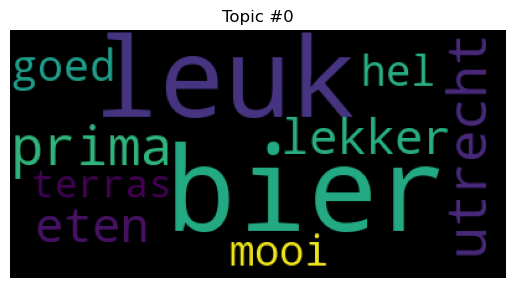

frequencies:  {'bier': 0.016599981, 'leuk': 0.014570127, 'prima': 0.012983054, 'utrecht': 0.012982785, 'lekker': 0.012982552, 'eten': 0.012981925, 'goed': 0.011160654, 'mooi': 0.01113955, 'hel': 0.01111077, 'terras': 0.009338415}


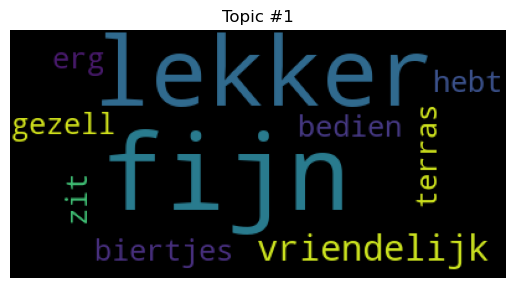

frequencies:  {'fijn': 0.018747183, 'lekker': 0.01568513, 'vriendelijk': 0.009564284, 'erg': 0.0065037804, 'zit': 0.0065035657, 'terras': 0.006503563, 'biertjes': 0.006503547, 'bedien': 0.0065035294, 'gezell': 0.0065035233, 'hebt': 0.0065034693}


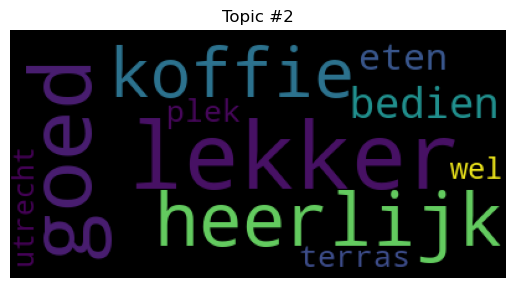

frequencies:  {'lekker': 0.0209565, 'goed': 0.017747996, 'heerlijk': 0.017747968, 'koffie': 0.015341411, 'bedien': 0.013737051, 'eten': 0.010528425, 'terras': 0.010528382, 'plek': 0.010528381, 'wel': 0.00972609, 'utrecht': 0.008923956}


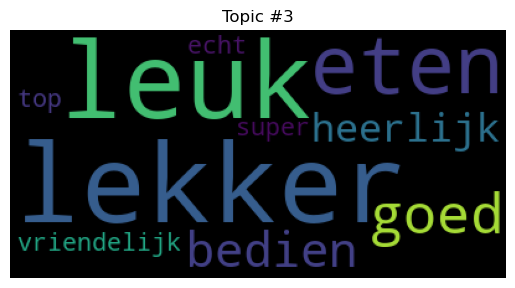

frequencies:  {'lekker': 0.019629035, 'leuk': 0.018326089, 'eten': 0.018134603, 'goed': 0.01663751, 'bedien': 0.012151492, 'heerlijk': 0.010656102, 'vriendelijk': 0.0091605, 'super': 0.009160452, 'echt': 0.009160406, 'top': 0.009160353}


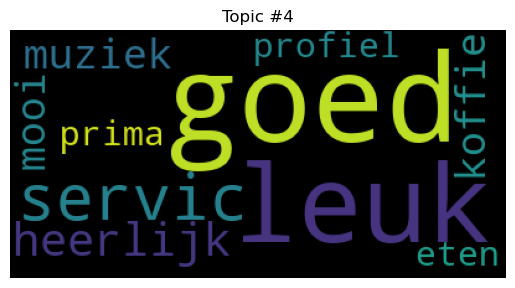

frequencies:  {'goed': 0.01686613, 'leuk': 0.012714827, 'servic': 0.012714422, 'heerlijk': 0.010638071, 'muziek': 0.008563001, 'mooi': 0.008562993, 'koffie': 0.008562843, 'profiel': 0.008562752, 'prima': 0.0085622, 'eten': 0.008560661}


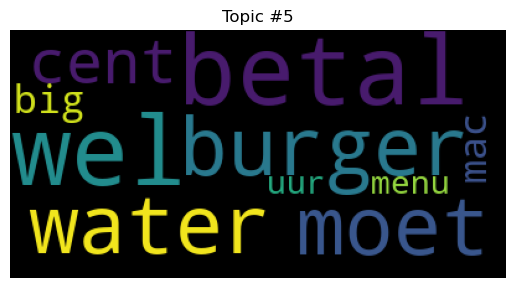

frequencies:  {'wel': 0.012874275, 'betal': 0.01287358, 'burger': 0.008754026, 'water': 0.008753986, 'moet': 0.008753915, 'cent': 0.0046345675, 'big': 0.0046345354, 'mac': 0.0046345345, 'menu': 0.004634449, 'uur': 0.004634351}


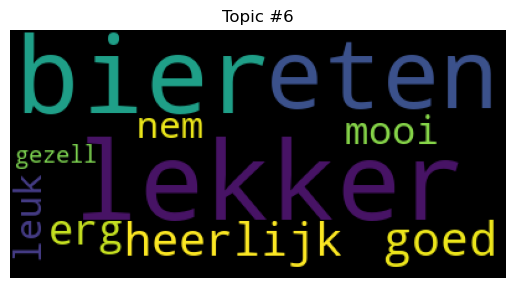

frequencies:  {'lekker': 0.02179311, 'bier': 0.020590963, 'eten': 0.016983848, 'goed': 0.013376398, 'heerlijk': 0.013376388, 'erg': 0.010971808, 'mooi': 0.009769268, 'nem': 0.008566867, 'leuk': 0.008566851, 'gezell': 0.007364431}


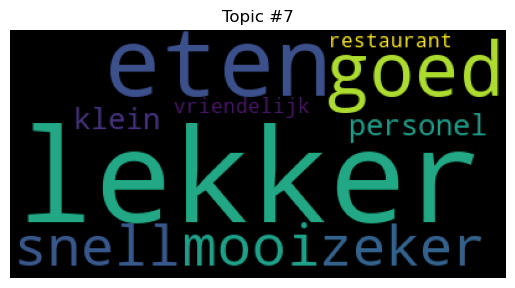

frequencies:  {'lekker': 0.017169256, 'eten': 0.014366979, 'goed': 0.014366559, 'mooi': 0.008759957, 'snell': 0.008759884, 'zeker': 0.008759799, 'personel': 0.0059568174, 'klein': 0.0059567667, 'vriendelijk': 0.005956641, 'restaurant': 0.0059566377}


In [28]:
#... for plotting and wordclouds
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topics = ldamodel.show_topics(formatted=False)
for ii, topic in enumerate(topics):
    freq = {k[0]: k[1] for k in ldamodel.show_topics(formatted=False)[ii][1]}
    
    plt.figure()
    plt.imshow(WordCloud().fit_words(freq))
    plt.axis("off")
    plt.title("Topic #" + str(ii))
    plt.show()
    print('frequencies: ', freq)

In [29]:
topics_utrecht.explore(column='P_topic_2',
                   marker_kwds=dict(radius=8, fill=True),
                   style_kwds=dict(weight=1, fillOpacity=0.75)
                  )

## Spatial aggregation
Determine the mean topic probability per neighbourhood.

Download data on the [wijken en buurten](https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2022) from the Central Bureau of Statistics (CBS). Unzip the data in your local data folder. Note there are shapefiles and a geopackage. 



In [30]:
# load the data and limit the number of attributes
zones = gpd.read_file('../data/wijkbuurtkaart_2022_v1/wijk_2022_v1.shp')
zones = zones.loc[:,['geometry', 'WK_NAAM','GM_NAAM']]

utrecht = zones[zones.GM_NAAM == 'Utrecht']
m = utrecht.explore(column='WK_NAAM', style_kwds=dict(fill=True))

# check the crs
print(zones.crs)
# visualize multip le layers interactively
topics_utrecht.explore(m=m,
                       marker_kwds=dict(radius=5, fill=True),
                       style_kwds=dict(weight=0.52, color='white', fillOpacity=0.95 )
                      )

epsg:28992


In [32]:
# Overlay and zonal stats
topic_zones = topics_utrecht.sjoin(zones.to_crs('EPSG:4326'))

# link to wijken 
topic_stats = topic_zones.groupby('WK_NAAM').mean(numeric_only=True)
topic_stats.drop(['distance', 'index_right'], inplace=True, axis=1)

topic_stats['topic_max'] = topic_stats.idxmax(axis=1)
topic_stats.reset_index(inplace=True)

gdf = utrecht.merge(topic_stats, on='WK_NAAM')
# visualize per topic and which topics is most popular where.
gdf.explore(column='P_topic_0')